In [1]:
import calendar 
import datetime
import dask.dataframe as dd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [2]:
# load crimes parquet data into dask df
data_file_name = '../data/crimes-2017.snappy.parq'
crimes = dd.read_parquet(data_file_name, index='Date')

In [3]:
%%time
# log records count and load data partitions
print("{:,} total records in {} partitions".format(len(crimes), crimes.npartitions))
print("DataFrame size: {:,}".format(crimes.size.compute()))

146,711 total records in 1 partitions
DataFrame size: 1,173,688
Wall time: 2.84 s


In [4]:
# check data frame structure
crimes

,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
npartitions=1,,,,,,,,
2017-01-01 00:00:00,object,object,object,object,bool,bool,float64,float64
2017-07-25 23:50:00,...,...,...,...,...,...,...,...


In [5]:
# preview crimes data with Date index
crimes.head()

,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
Date,,,,,,,,
2017-07-22 04:39:00,082XX S EMERALD AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,NaN,NaN
2017-07-25 22:32:00,078XX S CARPENTER ST,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,41.751545,-87.650128
2017-07-25 06:25:00,003XX N LOREL AVE,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,41.886330,-87.758956
2017-02-15 11:20:00,003XX S CANAL ST,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,NaN,NaN
2017-07-14 09:00:00,014XX W 112TH PL,BURGLARY,FORCIBLE ENTRY,VACANT LOT/LAND,False,False,NaN,NaN


In [6]:
# get crime types
crime_types = crimes[['PrimaryType']]

In [7]:
crime_types.head()

,PrimaryType
Date,
2017-07-22 04:39:00,HOMICIDE
2017-07-25 22:32:00,HOMICIDE
2017-07-25 06:25:00,HOMICIDE
2017-02-15 11:20:00,HOMICIDE
2017-07-14 09:00:00,BURGLARY


In [8]:
# get crime counts by primary type
crime_type_total = crime_types.groupby('PrimaryType').size().compute()
print(crime_type_total.sort_values(ascending=False))

PrimaryType
THEFT                                34103
BATTERY                              27828
CRIMINAL DAMAGE                      16362
ASSAULT                              10925
OTHER OFFENSE                        10047
DECEPTIVE PRACTICE                    9455
BURGLARY                              7190
MOTOR VEHICLE THEFT                   6355
ROBBERY                               6207
NARCOTICS                             5890
CRIMINAL TRESPASS                     3939
WEAPONS VIOLATION                     2616
OFFENSE INVOLVING CHILDREN            1194
PUBLIC PEACE VIOLATION                 877
CRIM SEXUAL ASSAULT                    808
INTERFERENCE WITH PUBLIC OFFICER       633
SEX OFFENSE                            514
PROSTITUTION                           488
HOMICIDE                               387
ARSON                                  266
LIQUOR LAW VIOLATION                   122
STALKING                               118
KIDNAPPING                             105

In [9]:
# get arrests and domestic counts for each primary crime type
crime_type_counts = crimes[['PrimaryType', 'Arrest', 'Domestic']].groupby('PrimaryType').sum().compute()
print(crime_type_counts.sort_values(by='Arrest', ascending=False))

                                   Arrest  Domestic
PrimaryType                                        
NARCOTICS                          5887.0       5.0
BATTERY                            5533.0   13553.0
THEFT                              3459.0    1306.0
CRIMINAL TRESPASS                  2391.0     184.0
OTHER OFFENSE                      2247.0    3110.0
WEAPONS VIOLATION                  2093.0      10.0
ASSAULT                            1936.0    2801.0
CRIMINAL DAMAGE                     974.0    1898.0
INTERFERENCE WITH PUBLIC OFFICER    601.0       3.0
PUBLIC PEACE VIOLATION              587.0      29.0
MOTOR VEHICLE THEFT                 510.0      61.0
PROSTITUTION                        488.0       0.0
ROBBERY                             378.0     110.0
DECEPTIVE PRACTICE                  350.0      87.0
BURGLARY                            251.0     100.0
OFFENSE INVOLVING CHILDREN          144.0     599.0
LIQUOR LAW VIOLATION                122.0       1.0
GAMBLING    

In [10]:
# add crime type totals column
crime_type_counts['Total'] = crime_type_total

In [11]:
print(crime_type_counts)

                                   Arrest  Domestic  Total
PrimaryType                                               
ARSON                                18.0       8.0    266
ASSAULT                            1936.0    2801.0  10925
BATTERY                            5533.0   13553.0  27828
BURGLARY                            251.0     100.0   7190
CONCEALED CARRY LICENSE VIOLATION    31.0       0.0     33
CRIM SEXUAL ASSAULT                  30.0     117.0    808
CRIMINAL DAMAGE                     974.0    1898.0  16362
CRIMINAL TRESPASS                  2391.0     184.0   3939
DECEPTIVE PRACTICE                  350.0      87.0   9455
GAMBLING                             97.0       0.0     97
HOMICIDE                             56.0      17.0    387
HUMAN TRAFFICKING                     0.0       2.0      5
INTERFERENCE WITH PUBLIC OFFICER    601.0       3.0    633
INTIMIDATION                          4.0       6.0     79
KIDNAPPING                            8.0      37.0    1

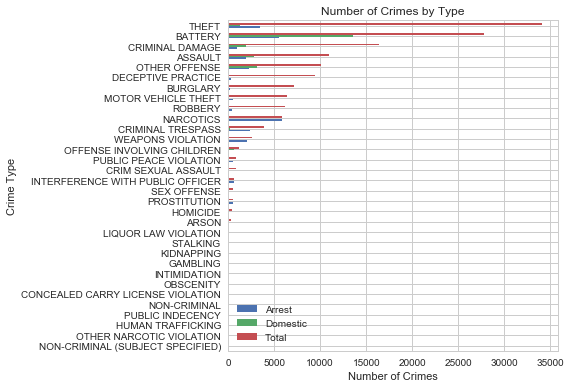

In [12]:
# plot crimes by primary type total ascending
plt.figure(figsize=(8,10))
crime_type_counts.sort_values(by='Total', ascending=True).plot(kind='barh')
plt.title('Number of Crimes by Type')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')
plt.tight_layout()
plt.show()

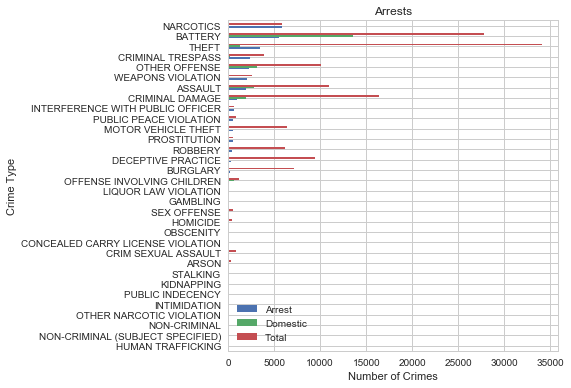

In [13]:
# plot crimes by arrests ascending
crime_type_counts.sort_values(by='Arrest', ascending=True).plot(kind='barh')
plt.title('Arrests')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')
plt.tight_layout()
plt.show()

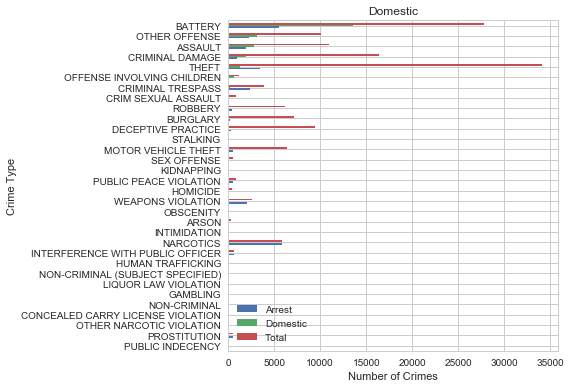

In [14]:
# plot crimes by domestic incident reports ascending
crime_type_counts.sort_values(by='Domestic', ascending=True).plot(kind='barh')
plt.title('Domestic')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')
plt.tight_layout()
plt.show()

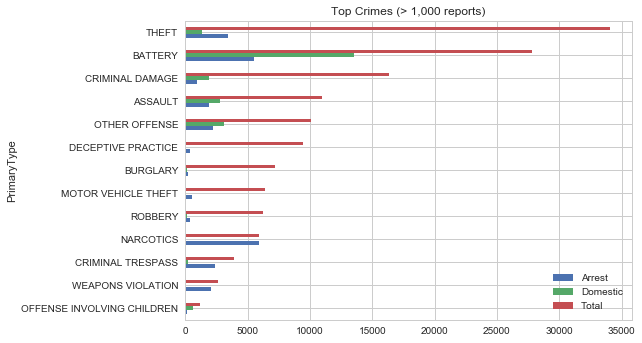

In [15]:
# top crimes
crime_type_counts[crime_type_counts['Total'] >= 1000].sort_values(by='Total', ascending=True)\
.plot(kind='barh')
plt.title('Top Crimes (> 1,000 reports)')

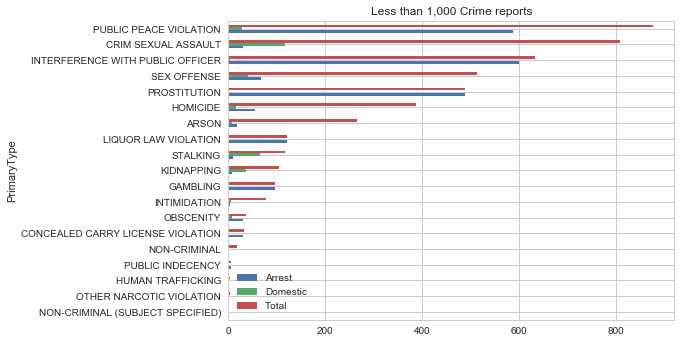

In [16]:
# less than 1000 crime reports
crime_type_counts[crime_type_counts['Total'] < 1000].sort_values(by='Total', ascending=True)\
.plot(kind='barh')
plt.title('Less than 1,000 Crime reports')

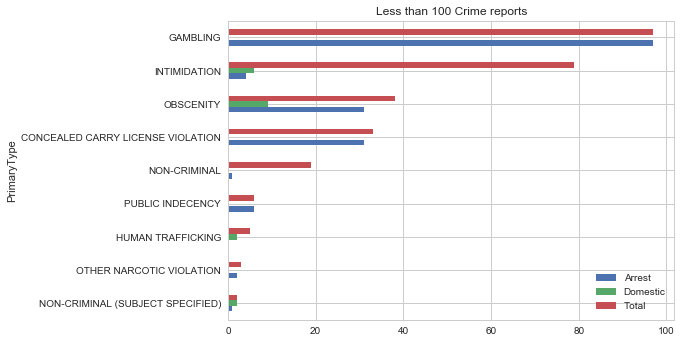

In [17]:
# less than 100 crime reports
crime_type_counts[crime_type_counts['Total'] < 100].sort_values(by='Total', ascending=True)\
.plot(kind='barh')
plt.title('Less than 100 Crime reports')

In [18]:
# get crime location counts
crime_locations = crimes.groupby('LocationDescription').size().compute()
crime_locations = crime_locations.sort_values(ascending=False).rename('Total') #.reset_index()
crime_locations.head()

LocationDescription
STREET       33216
RESIDENCE    25197
APARTMENT    18650
SIDEWALK     11466
OTHER         6024
Name: Total, dtype: int64

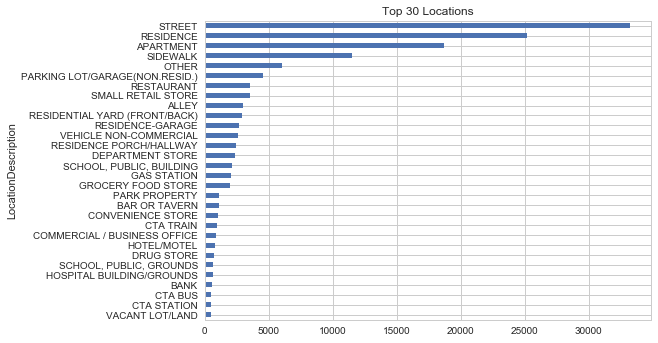

In [19]:
# plot top 30 locations
crime_locations[:30].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 30 Locations')

In [20]:
# get arrests and domestic counts for each location description
crime_location_counts = crimes[['LocationDescription', 'Arrest', 'Domestic']]\
.groupby('LocationDescription').sum().compute()
# add crime location totals column
crime_location_counts['Total'] = crime_locations
crime_location_counts.head()

,Arrest,Domestic,Total
LocationDescription,,,
ABANDONED BUILDING,85.0,7.0,196
AIRCRAFT,2.0,0.0,33
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,7.0,1.0,53
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,4.0,2.0,41
AIRPORT EXTERIOR - NON-SECURE AREA,6.0,1.0,48


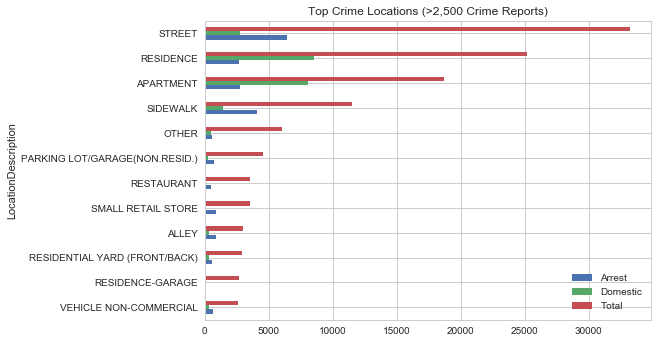

In [21]:
# plot top crime locations
crime_location_counts[crime_location_counts['Total'] >= 2500]\
.sort_values(by='Total', ascending=True).plot(kind='barh')
plt.title('Top Crime Locations (>2,500 Crime Reports)')

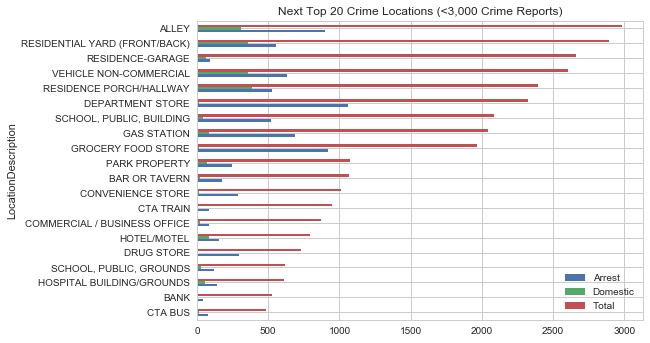

In [22]:
# plot next 20 top crime locations
crime_location_counts = crime_location_counts[crime_location_counts['Total'] <= 3000]\
.sort_values(by='Total', ascending=False)
crime_location_counts[:20].sort_values(by='Total', ascending=True).plot(kind='barh')
plt.title('Next Top 20 Crime Locations (<3,000 Crime Reports)')

In [23]:
crimes.index

Dask Index Structure:
npartitions=1
2017-01-01 00:00:00    datetime64[ns]
2017-07-25 23:50:00               ...
Name: Date, dtype: datetime64[ns]
Dask Name: read-parquet, 2 tasks

In [24]:
# get arrests
arrests = crimes[crimes['Arrest'] == True]['Arrest']
arrests.head()

Date
2017-02-15 11:20:00    True
2017-07-25 18:30:00    True
2017-07-25 23:00:00    True
2017-07-25 15:15:00    True
2017-07-25 11:40:00    True
Name: Arrest, dtype: bool

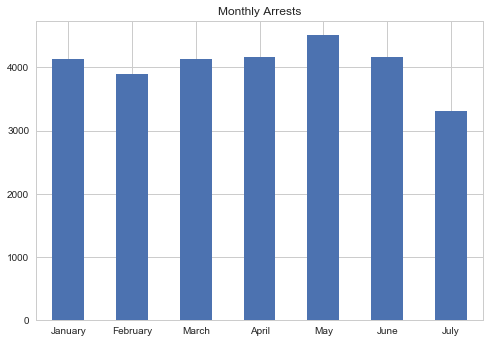

In [25]:
# plot monthly arrests
monthly_arrests = arrests.resample('M').sum().compute()
monthly_arrests.plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6], calendar.month_name[1:13], rotation=0)
plt.title('Monthly Arrests')
plt.show()

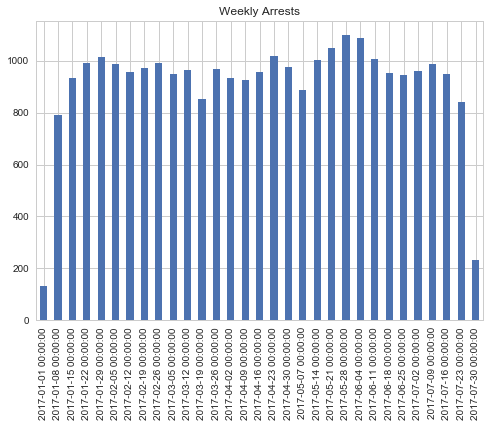

In [26]:
# plot weekly arrests
weekly_arrests = arrests.resample('W').sum().compute()
weekly_arrests.plot(kind='bar')
plt.title('Weekly Arrests')
plt.show()

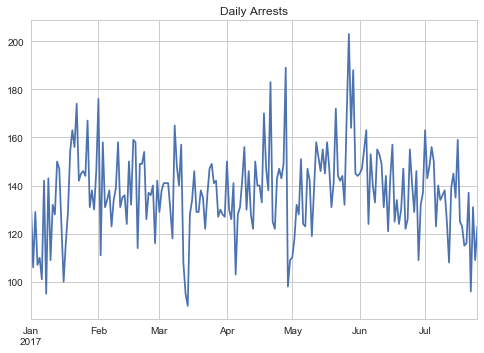

In [27]:
# plot daily arrests
daily_arrests = arrests.resample('D').sum().compute()
daily_arrests.plot()
plt.title('Daily Arrests')
plt.show()

In [28]:
# get domestic crimes
domestic = crimes[crimes['Domestic'] == True]['Domestic']
domestic.head()

Date
2017-07-22 08:30:00    True
2017-07-02 18:00:00    True
2017-07-15 02:00:00    True
2017-07-02 11:45:00    True
2017-07-23 13:00:00    True
Name: Domestic, dtype: bool

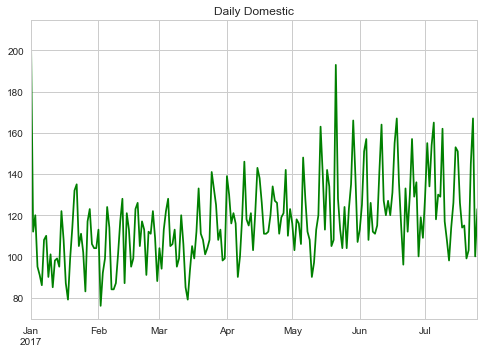

In [29]:
# plot daily domestic
daily_domestic = domestic.resample('D').sum().compute()
daily_domestic.plot(color='g')
plt.title('Daily Domestic')
plt.show()

In [30]:
# get daily crime counts
daily_crime = crime_types.resample('D').count().compute()
daily_crime.head()

,PrimaryType
2017-01-01,920
2017-01-02,598
2017-01-03,704
2017-01-04,610
2017-01-05,599


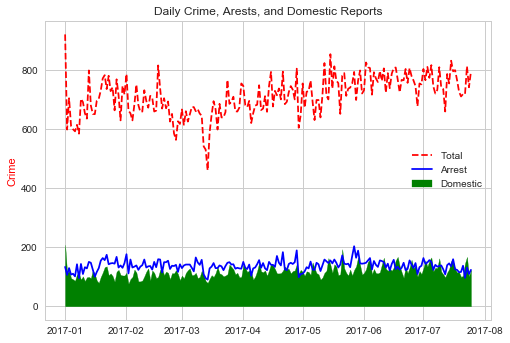

In [31]:
# plot daily crime counts, arrests, and domestic reports
fig, ax = plt.subplots()
ax.plot(daily_crime.index, daily_crime, '--', label='Total', color='r', zorder=10)
ax.plot(daily_arrests.index, daily_arrests, color='b', zorder=10)
ax.fill_between(daily_domestic.index, daily_domestic, label='Domestic', color='g')
ax.set_ylabel('Crime', color='r')
ax.legend(loc='right')
plt.title('Daily Crime, Arests, and Domestic Reports')
plt.show()

In [32]:
# get the most violent crimes, in my opinion
violent_crimes = crime_types[(crime_types['PrimaryType']=='ARSON') | \
                             (crime_types['PrimaryType']=='CRIM SEXUAL ASSAULT') | \
                             (crime_types['PrimaryType']=='HOMICIDE') | \
                             (crime_types['PrimaryType']=='HUMAN TRAFFICKING') | \
                             (crime_types['PrimaryType']=='KIDNAPPING') | \
                             (crime_types['PrimaryType']=='OFFENSE INVOLVING CHILDREN')]
violent_crimes.head()

,PrimaryType
Date,
2017-07-22 04:39:00,HOMICIDE
2017-07-25 22:32:00,HOMICIDE
2017-07-25 06:25:00,HOMICIDE
2017-02-15 11:20:00,HOMICIDE
2017-07-24 04:25:00,ARSON


In [33]:
# show counts
violent_crimes.PrimaryType.value_counts().head()

OFFENSE INVOLVING CHILDREN    1194
CRIM SEXUAL ASSAULT            808
HOMICIDE                       387
ARSON                          266
KIDNAPPING                     105
Name: PrimaryType, dtype: int64

In [34]:
# categorize by primary type
violent_crimes = violent_crimes.categorize(columns='PrimaryType')
violent_crimes.head()

,PrimaryType
Date,
2017-07-22 04:39:00,HOMICIDE
2017-07-25 22:32:00,HOMICIDE
2017-07-25 06:25:00,HOMICIDE
2017-02-15 11:20:00,HOMICIDE
2017-07-24 04:25:00,ARSON


In [35]:
violent_crimes

,PrimaryType
npartitions=1,
2017-01-01 00:00:00,category[known]
2017-07-25 23:50:00,...


In [36]:
# get categories
violent_crimes.PrimaryType.cat.categories

Index(['HOMICIDE', 'ARSON', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'KIDNAPPING', 'HUMAN TRAFFICKING'],
      dtype='object', name='PrimaryType')

In [37]:
# group by day and crime type
violent_crimes_groupby = violent_crimes.groupby([pd.TimeGrouper('M'), 'PrimaryType'])
violent_crime_data = violent_crimes_groupby['PrimaryType'].count().compute().rename('Count')
violent_crime_data.head(10)

Date        PrimaryType               
2017-01-31  HOMICIDE                       53
            ARSON                          37
            CRIM SEXUAL ASSAULT           134
            OFFENSE INVOLVING CHILDREN    214
            KIDNAPPING                      8
2017-02-28  HOMICIDE                       48
            ARSON                          40
            CRIM SEXUAL ASSAULT           117
            OFFENSE INVOLVING CHILDREN    119
            KIDNAPPING                     13
Name: Count, dtype: int64

In [38]:
# unstack crime type group for series plotting
violent_crime_data = violent_crime_data.unstack()
violent_crime_data.head(10)

PrimaryType,HOMICIDE,ARSON,CRIM SEXUAL ASSAULT,OFFENSE INVOLVING CHILDREN,KIDNAPPING,HUMAN TRAFFICKING
Date,,,,,,
2017-01-31,53.0,37.0,134.0,214.0,8.0,NaN
2017-02-28,48.0,40.0,117.0,119.0,13.0,NaN
2017-03-31,37.0,27.0,95.0,175.0,18.0,4.0
2017-04-30,46.0,46.0,130.0,172.0,15.0,NaN
2017-05-31,57.0,38.0,120.0,197.0,18.0,1.0
2017-06-30,84.0,44.0,109.0,179.0,14.0,NaN
2017-07-31,62.0,34.0,103.0,138.0,19.0,NaN


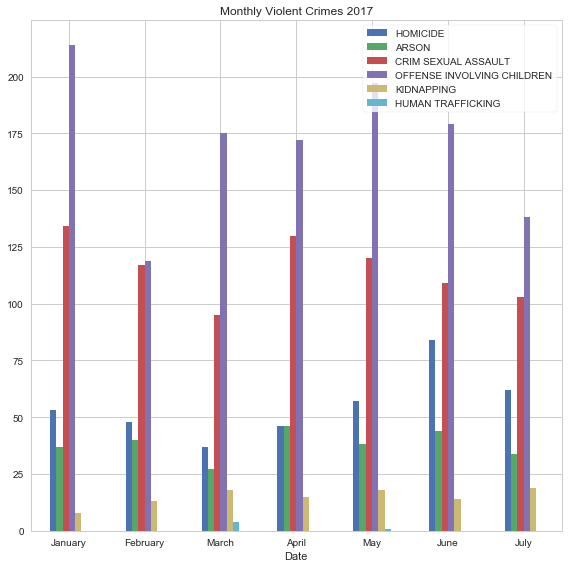

In [39]:
# plot violent crime data
violent_crime_data.plot(figsize=(8,8), kind='bar')
plt.xticks([0,1,2,3,4,5,6], calendar.month_name[1:13], rotation=0)
plt.legend(loc='upper right', frameon=True)
plt.title('Monthly Violent Crimes 2017')
plt.tight_layout()
plt.show()